In [374]:
from dataset import lr_dataset
from matplotlib import pyplot as plt
from math import sqrt

In [375]:
x_train, y_train, x_test, y_test = lr_dataset()

In [377]:
def mean(x):
    return float(sum(x)/len(x))

In [378]:
def variance(x):
    M = mean(x)
    return sum((i-M)**2 for i in x)/len(x) 

In [379]:
def covariance(x, y):
    cvr = 0
    for i in range(len(x)):
        cvr+=(x[i]-mean(x))*(y[i]-mean(y))
    return cvr/(len(x)-1)

In [380]:
def avg_loss(predicted, y_test):
    loss = 0
    for i in range(len(predicted)):
        loss += abs((predicted[i]-y_test[i]))
    return loss/len(y_test)

In [382]:
def avg_rms_loss(predicted, y_test):
        loss = 0
        for i in range(len(predicted)):
            loss += (predicted[i]-y_test[i])**2
        return sqrt(abs(loss)/len(y_test))

In [385]:
def function_coeff(x, y):# y = slope*x+constant
    slope = covariance(x,y)/variance(x)
    constant = mean(y)-slope*mean(x)
    return slope, constant

In [386]:
#Here loss function is taken as |y-yi|
#Used gradient descent approach for modifying slope and constant 

In [387]:
def modification_in_slope(x_test):
    return -(mean(x_test))
    

In [388]:
def modification_in_constant(x_test):
    return -1/len(x_test)

In [389]:
def linear_regression(x_train,y_train, x_test, y_test, Lr):
    a,b = function_coeff(x_train, y_train)
    
    predicted_val = []
    for i in x_test:
        y_predicted = a*i+b
        predicted_val.append(y_predicted)
        
    dslope = modification_in_slope(x_test)
    dconstant = modification_in_constant(x_test)
    a-=dslope*Lr
    b-=dconstant*Lr
    
    new_predicted_val=[]
    for i in x_test:
        y_predicted = a*i+b
        new_predicted_val.append(y_predicted)
    return predicted_val,new_predicted_val

In [390]:
import numpy as np
predicted_val,new_predicted_val = np.array(linear_regression(x_train, y_train, x_test, y_test,0.001))

avg loss: 127.25
avg rms loss: 156.66


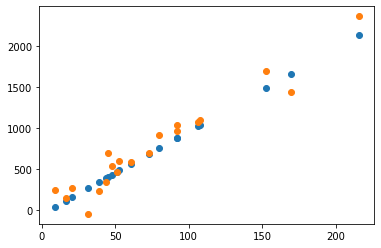

In [394]:
plt.scatter(x_test, predicted_val)
plt.scatter(x_test, y_test)
print("avg loss: %.2f"%(avg_loss(predicted_val,y_test)))
print("avg rms loss: %.2f"%(avg_rms_loss(predicted_val,y_test)))

avg loss: 124.07
avg rms loss: 154.31


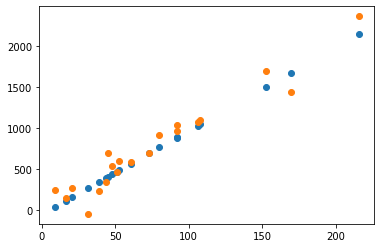

In [395]:
# plt.scatter(x_test, predicted_val)
plt.scatter(x_test, new_predicted_val)
plt.scatter(x_test, y_test)
print("avg loss: %.2f"%(avg_loss(new_predicted_val,y_test)))
print("avg rms loss: %.2f"%(avg_rms_loss(new_predicted_val,y_test)))